In [24]:
using Revise

In [185]:
using JSON2, PyPlot

In [186]:
using ClimateMARGO

In [187]:
using ClimateMARGO.Models

In [188]:
using ClimateMARGO.Diagnostics

In [189]:
using ClimateMARGO.Utils

In [190]:
using ClimateMARGO.Optimization

In [221]:
dom = Domain(5., 2020., 2020., 2200.)

# Physics
phys = Physics(460., 1.1, 4.97, 1.13, 106, 0.73, 0.5)

# Economics
econ = Economics(
    100.,
    0.02,
    0.02/(3.0)^2,
    0.01,
    8.5,
    0.02, 13, 0.046, 4.5,
    0., 0., 0., 0.,
    ramp_emissions(dom), 
    zeros(size(t(dom)))
)

# Controls
cont = Controls(
    zeros(size(t(dom))),
    zeros(size(t(dom))), 
    zeros(size(t(dom))), 
    zeros(size(t(dom)))
)
cont.remove .+= 0.1;
cont.mitigate .+= 0.1;
cont.geoeng .+= 0.075;
cont.adapt .+= 0.05;

# Full model
m = ClimateModel(
    "test",
    dom,
    econ,
    phys,
    cont
);

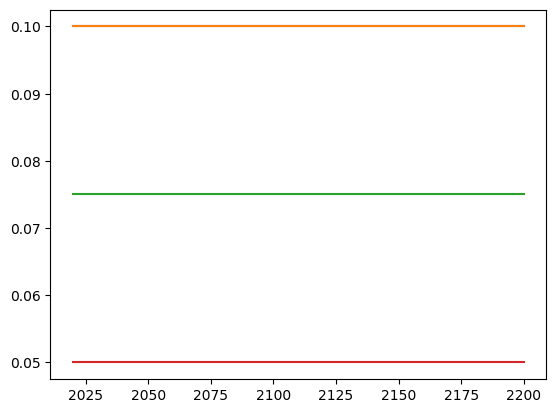

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17c761be0>

In [222]:
plot(t(m), cont.mitigate)
plot(t(m), cont.remove)
plot(t(m), cont.geoeng)
plot(t(m), cont.adapt)

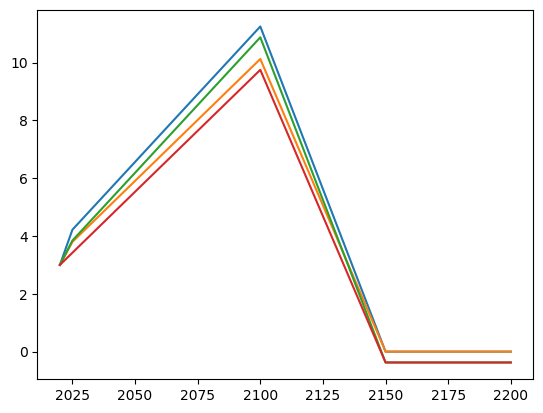

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d35a630>

In [223]:
plot(t(m), effective_emissions(m))
plot(t(m), effective_emissions(m, M=true))
plot(t(m), effective_emissions(m, R=true))
plot(t(m), effective_emissions(m, M=true, R=true))

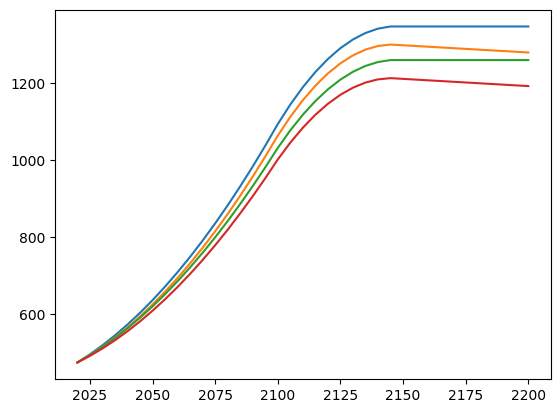

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d57aef0>

In [224]:
plot(t(m), c(m))
plot(t(m), c(m, R=true))
plot(t(m), c(m, M=true))
plot(t(m), c(m, M=true, R=true))

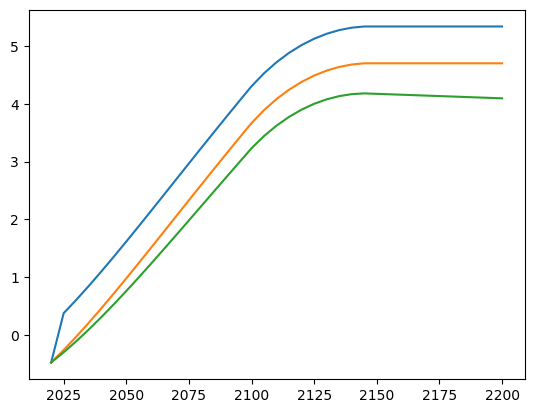

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d5e4b38>

In [225]:
plot(t(m), F(m))
plot(t(m), F(m, G=true))
plot(t(m), F(m, G=true, M=true, R=true))

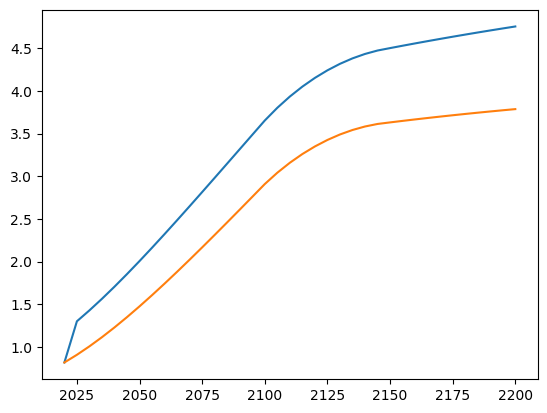

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d72cc18>

In [226]:
plot(t(m), T(m))
plot(t(m), T(m, M=true, R=true, G=true, A=true))

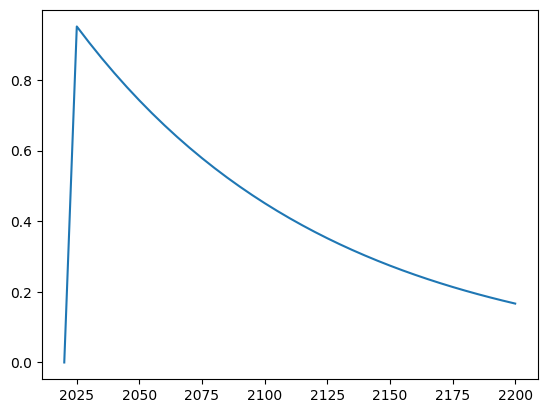

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d950588>

In [227]:
plot(t(m), discount(m))

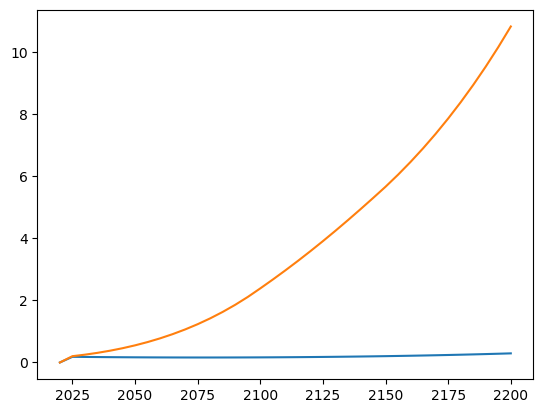

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17d9b92e8>

In [228]:
plot(t(m), cost(m, discounting=true, M=true, R=true, G=true, A=true))
plot(t(m), benefit(m, discounting=true, M=true, R=true, G=true, A=true))

In [229]:
net_present_cost(m, discounting=true, M=true, G=true)

23.339033368258814

In [230]:
function save(m::ClimateModel; config_path = "../configurations/")
    open("$(config_path)/$(m.name).json","w") do file
        write(file, JSON2.write(m));
    end
end

save (generic function with 1 method)

In [231]:
save(m);

In [232]:
function load(name::String; config_path = "../configurations/")
    open("$(config_path)/$(m.name).json","r") do file
        return JSON2.read(read(file, String), ClimateModel)
    end
end

load (generic function with 1 method)

In [233]:
m = load("test");

# Testing optimization

In [234]:
msol = optimize_controls!(m, temp_goal=2.);

Solve_Succeeded


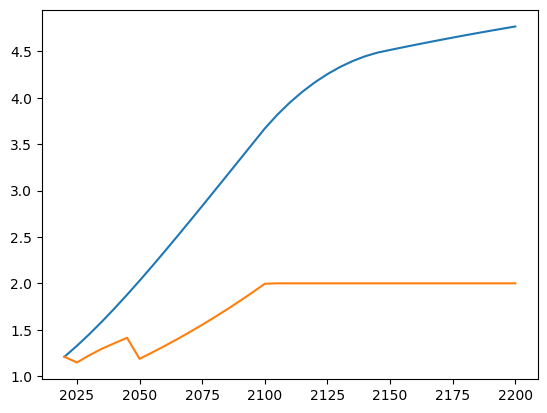

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17de44cc0>

In [235]:
plot(t(m), T(m))
plot(t(m), T(m, M=true, R=true, G=true, A=true))

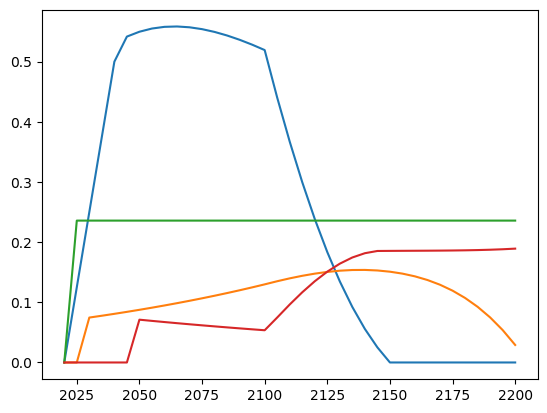

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17dea3eb8>

In [236]:
plot(t(m), m.controls.mitigate)
plot(t(m), m.controls.remove)
plot(t(m), m.controls.adapt)
plot(t(m), m.controls.geoeng)

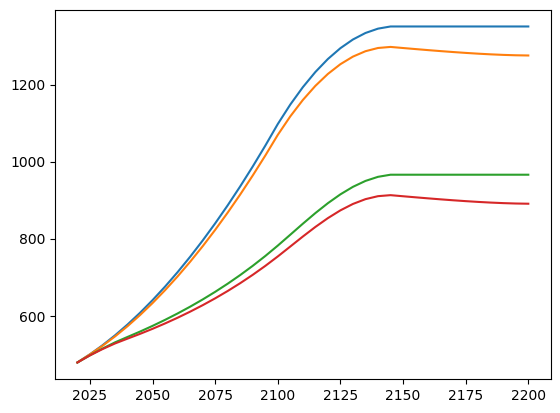

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17e9bdb38>

In [237]:
plot(t(m), c(m))
plot(t(m), c(m, R=true))
plot(t(m), c(m, M=true))
plot(t(m), c(m, M=true, R=true))